In [9]:
# install machine gnostic learning packages
# ! pip install machinegnostics # only if not installed

In [10]:
# Install and import dependencies
!pip install ucimlrepo

In [11]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from machinegnostics.models import train_test_split
from machinegnostics.models.regression import LinearRegressor
from machinegnostics.metrics import robr2, root_mean_squared_error, correlation, hc

# Fetch dataset (Wine Quality as example)
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets

# # Generate data
# X = np.linspace(0, 2, 10).reshape(-1, 1)
# y = 2.0 * np.exp(1.8 * X.ravel()) + np.random.normal(0, 0.2, 10)

In [12]:
# to numPy arrays
X = np.array(X)
y = np.array(y)

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_seed=42)

# Ensure targets are 1D arrays
y_train = np.array(y_train).squeeze()
y_test = np.array(y_test).squeeze()

# Fit machinegnostics LinearRegression
lr = LinearRegressor(verbose=True, early_stopping=True)
lr.fit(X_train, y_train)

# Predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

2025-09-26 22:43:31,821 | LinearRegressor | INFO | LinearRegressor initialized:
2025-09-26 22:43:31,822 | LinearRegressor | INFO | DataProcessLayerBase initialized.
2025-09-26 22:43:31,823 | LinearRegressor | INFO | DataProcessRobustRegressor initialized.
2025-09-26 22:43:31,823 | LinearRegressor | INFO | LinearRegressor initialized.
2025-09-26 22:43:31,824 | LinearRegressor | INFO | Starting fit process for LinearRegressor.
2025-09-26 22:43:31,824 | LinearRegressor | INFO | Starting fit process for DataProcessRobustRegressor.
2025-09-26 22:43:31,825 | LinearRegressor | INFO | Starting fit input/output processing.
2025-09-26 22:43:31,826 | LinearRegressor | INFO | Checking input X of type: <class 'numpy.ndarray'>
2025-09-26 22:43:31,826 | LinearRegressor | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2025-09-26 22:43:31,827 | LinearRegressor | INFO | Checking target y of type: <class 'numpy.ndarray'>
2025-09-26 22:43:31,827 | LinearRegressor | INFO | Identify

Train Robust R2: 0.2926
Test Robust R2: 0.2684
Train RMSE: 0.6437
Test RMSE: 0.6082
Train HC: 0.0571
Test HC: 0.0552


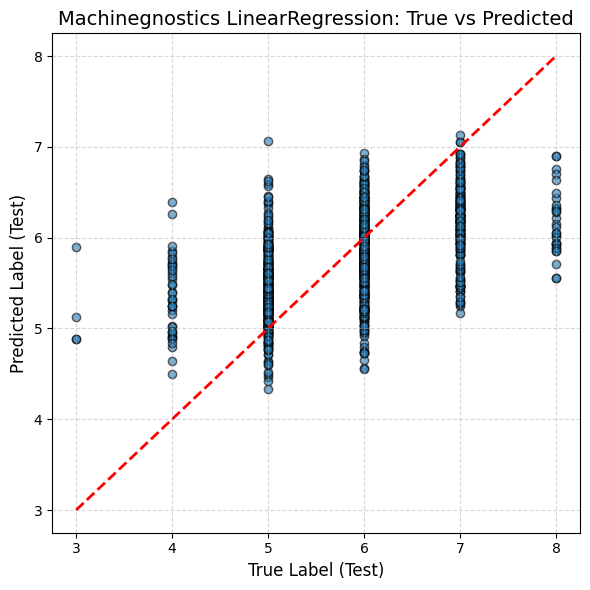

In [14]:
# Evaluate
train_r2 = robr2(y_train, y_train_pred)
test_r2 = robr2(y_test, y_test_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
hc_value_train = hc(y_train, y_train_pred)
hc_value_test = hc(y_test, y_test_pred)

print(f"Train Robust R2: {train_r2:.4f}")
print(f"Test Robust R2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train HC: {hc_value_train:.4f}")
print(f"Test HC: {hc_value_test:.4f}")

# Optional: Plot true vs predicted for test set
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='tab:blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Label (Test)', fontsize=12)
plt.ylabel('Predicted Label (Test)', fontsize=12)
plt.title('Machinegnostics LinearRegression: True vs Predicted', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

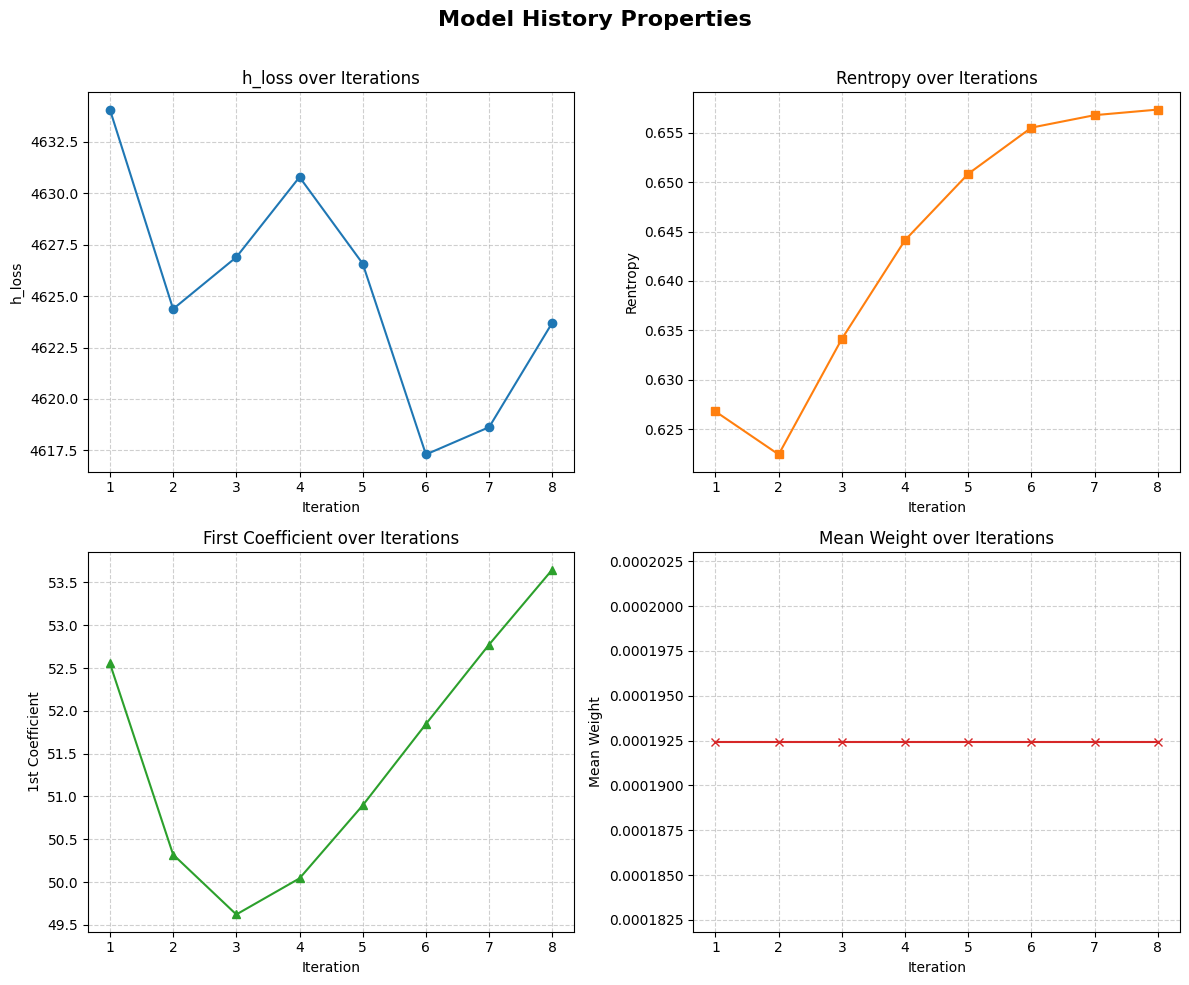

In [15]:
import matplotlib.pyplot as plt
import numpy as np

history = lr._history

# Remove entries with None for plotting
history_valid = [h for h in history if h['h_loss'] is not None]

iterations = [h['iteration'] for h in history_valid]
h_loss = [h['h_loss'] for h in history_valid]
rentropy = [h['rentropy'] for h in history_valid]
coef_0 = [h['coefficients'][0] for h in history_valid]
mean_weights = [np.mean(h['weights']) for h in history_valid]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].plot(iterations, h_loss, marker='o', color='tab:blue')
axes[0, 0].set_title('h_loss over Iterations')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('h_loss')
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

axes[0, 1].plot(iterations, rentropy, marker='s', color='tab:orange')
axes[0, 1].set_title('Rentropy over Iterations')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Rentropy')
axes[0, 1].grid(True, linestyle='--', alpha=0.6)

axes[1, 0].plot(iterations, coef_0, marker='^', color='tab:green')
axes[1, 0].set_title('First Coefficient over Iterations')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('1st Coefficient')
axes[1, 0].grid(True, linestyle='--', alpha=0.6)

axes[1, 1].plot(iterations, mean_weights, marker='x', color='tab:red')
axes[1, 1].set_title('Mean Weight over Iterations')
axes[1, 1].set_xlabel('Iteration')
axes[1, 1].set_ylabel('Mean Weight')
axes[1, 1].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Model History Properties', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [16]:
from machinegnostics.models import CrossValidator
from machinegnostics.metrics import mean_squared_error, root_mean_squared_error

cv = CrossValidator(model=lr, X=X, y=y, k=5, random_seed=42)
# shpae of X, y
print(f"X shape: {X.shape}, y shape: {y.shape}")
cv.evaluate(root_mean_squared_error)

2025-09-26 22:43:54,612 | LinearRegressor | INFO | Starting fit process for LinearRegressor.
2025-09-26 22:43:54,613 | LinearRegressor | INFO | Starting fit process for DataProcessRobustRegressor.
2025-09-26 22:43:54,613 | LinearRegressor | INFO | Starting fit input/output processing.
2025-09-26 22:43:54,613 | LinearRegressor | INFO | Checking input X of type: <class 'numpy.ndarray'>
2025-09-26 22:43:54,613 | LinearRegressor | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2025-09-26 22:43:54,613 | LinearRegressor | INFO | Checking target y of type: <class 'numpy.ndarray'>
2025-09-26 22:43:54,614 | LinearRegressor | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2025-09-26 22:43:54,614 | LinearRegressor | INFO | Starting fit process for InterfaceRobustRegressor. Logging to MLflow available.
2025-09-26 22:43:54,614 | LinearRegressor | INFO | Starting fit process for HistoryRobustRegressor.
2025-09-26 22:43:54,614 | LinearRegressor | INFO

X shape: (6497, 11), y shape: (6497, 1)


2025-09-26 22:43:54,840 | LinearRegressor | INFO | Converting data using form: a
2025-09-26 22:43:54,841 | LinearRegressor | INFO | Converting data using form: a
2025-09-26 22:43:54,841 | LinearRegressor | INFO | Converting data using form: a
2025-09-26 22:43:54,873 | LinearRegressor | INFO | Computing gnostic criterion.
2025-09-26 22:43:54,873 | LinearRegressor | INFO | Computing q and q1 for gnostic criterion.
2025-09-26 22:43:54,874 | LinearRegressor | INFO | Computing gnostic criterion for 'hi' loss.
2025-09-26 22:43:54,875 | LinearRegressor | INFO | Iteration: 3 - Machine Gnostic loss - hi : 4641.1688, rentropy: 0.5902
2025-09-26 22:43:54,875 | LinearRegressor | INFO | Solving weighted least squares.
2025-09-26 22:43:54,915 | LinearRegressor | INFO | Converting data using form: a
2025-09-26 22:43:54,916 | LinearRegressor | INFO | Converting data using form: a
2025-09-26 22:43:54,916 | LinearRegressor | INFO | Converting data using form: a
2025-09-26 22:43:54,949 | LinearRegressor 

[0.6522260494331881,
 0.6341673473419203,
 0.6469347530668415,
 0.6412229404529999,
 0.6054348268640042]